In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/airquality.csv'
df = pd.read_csv(url)
df_new = df.copy()

In [3]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [6]:
df.drop(['PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'],axis=1,inplace=True)

In [7]:
df.head(5)

,Date,Time,CO(GT),NO2(GT)
0,2004-03-10,18:00:00,2.6,113
1,2004-03-10,19:00:00,2.0,92
2,2004-03-10,20:00:00,2.2,114
3,2004-03-10,21:00:00,2.2,122
4,2004-03-10,22:00:00,1.6,116


In [8]:
df['datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'])
df = df.sort_values('datetime')

In [9]:
df.head()

,Date,Time,CO(GT),NO2(GT),datetime
0,2004-03-10,18:00:00,2.6,113,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,92,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,114,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,122,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,116,2004-03-10 22:00:00


In [10]:
df.drop(['Date','Time'],axis=1,inplace=True)

In [11]:
df.head()

,CO(GT),NO2(GT),datetime
0,2.6,113,2004-03-10 18:00:00
1,2.0,92,2004-03-10 19:00:00
2,2.2,114,2004-03-10 20:00:00
3,2.2,122,2004-03-10 21:00:00
4,1.6,116,2004-03-10 22:00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CO(GT)    9357 non-null   float64       
 1   NO2(GT)   9357 non-null   int64         
 2   datetime  9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 219.4 KB


In [13]:
df_2=df.copy()

In [14]:
df.drop('CO(GT)',axis=1,inplace=True)


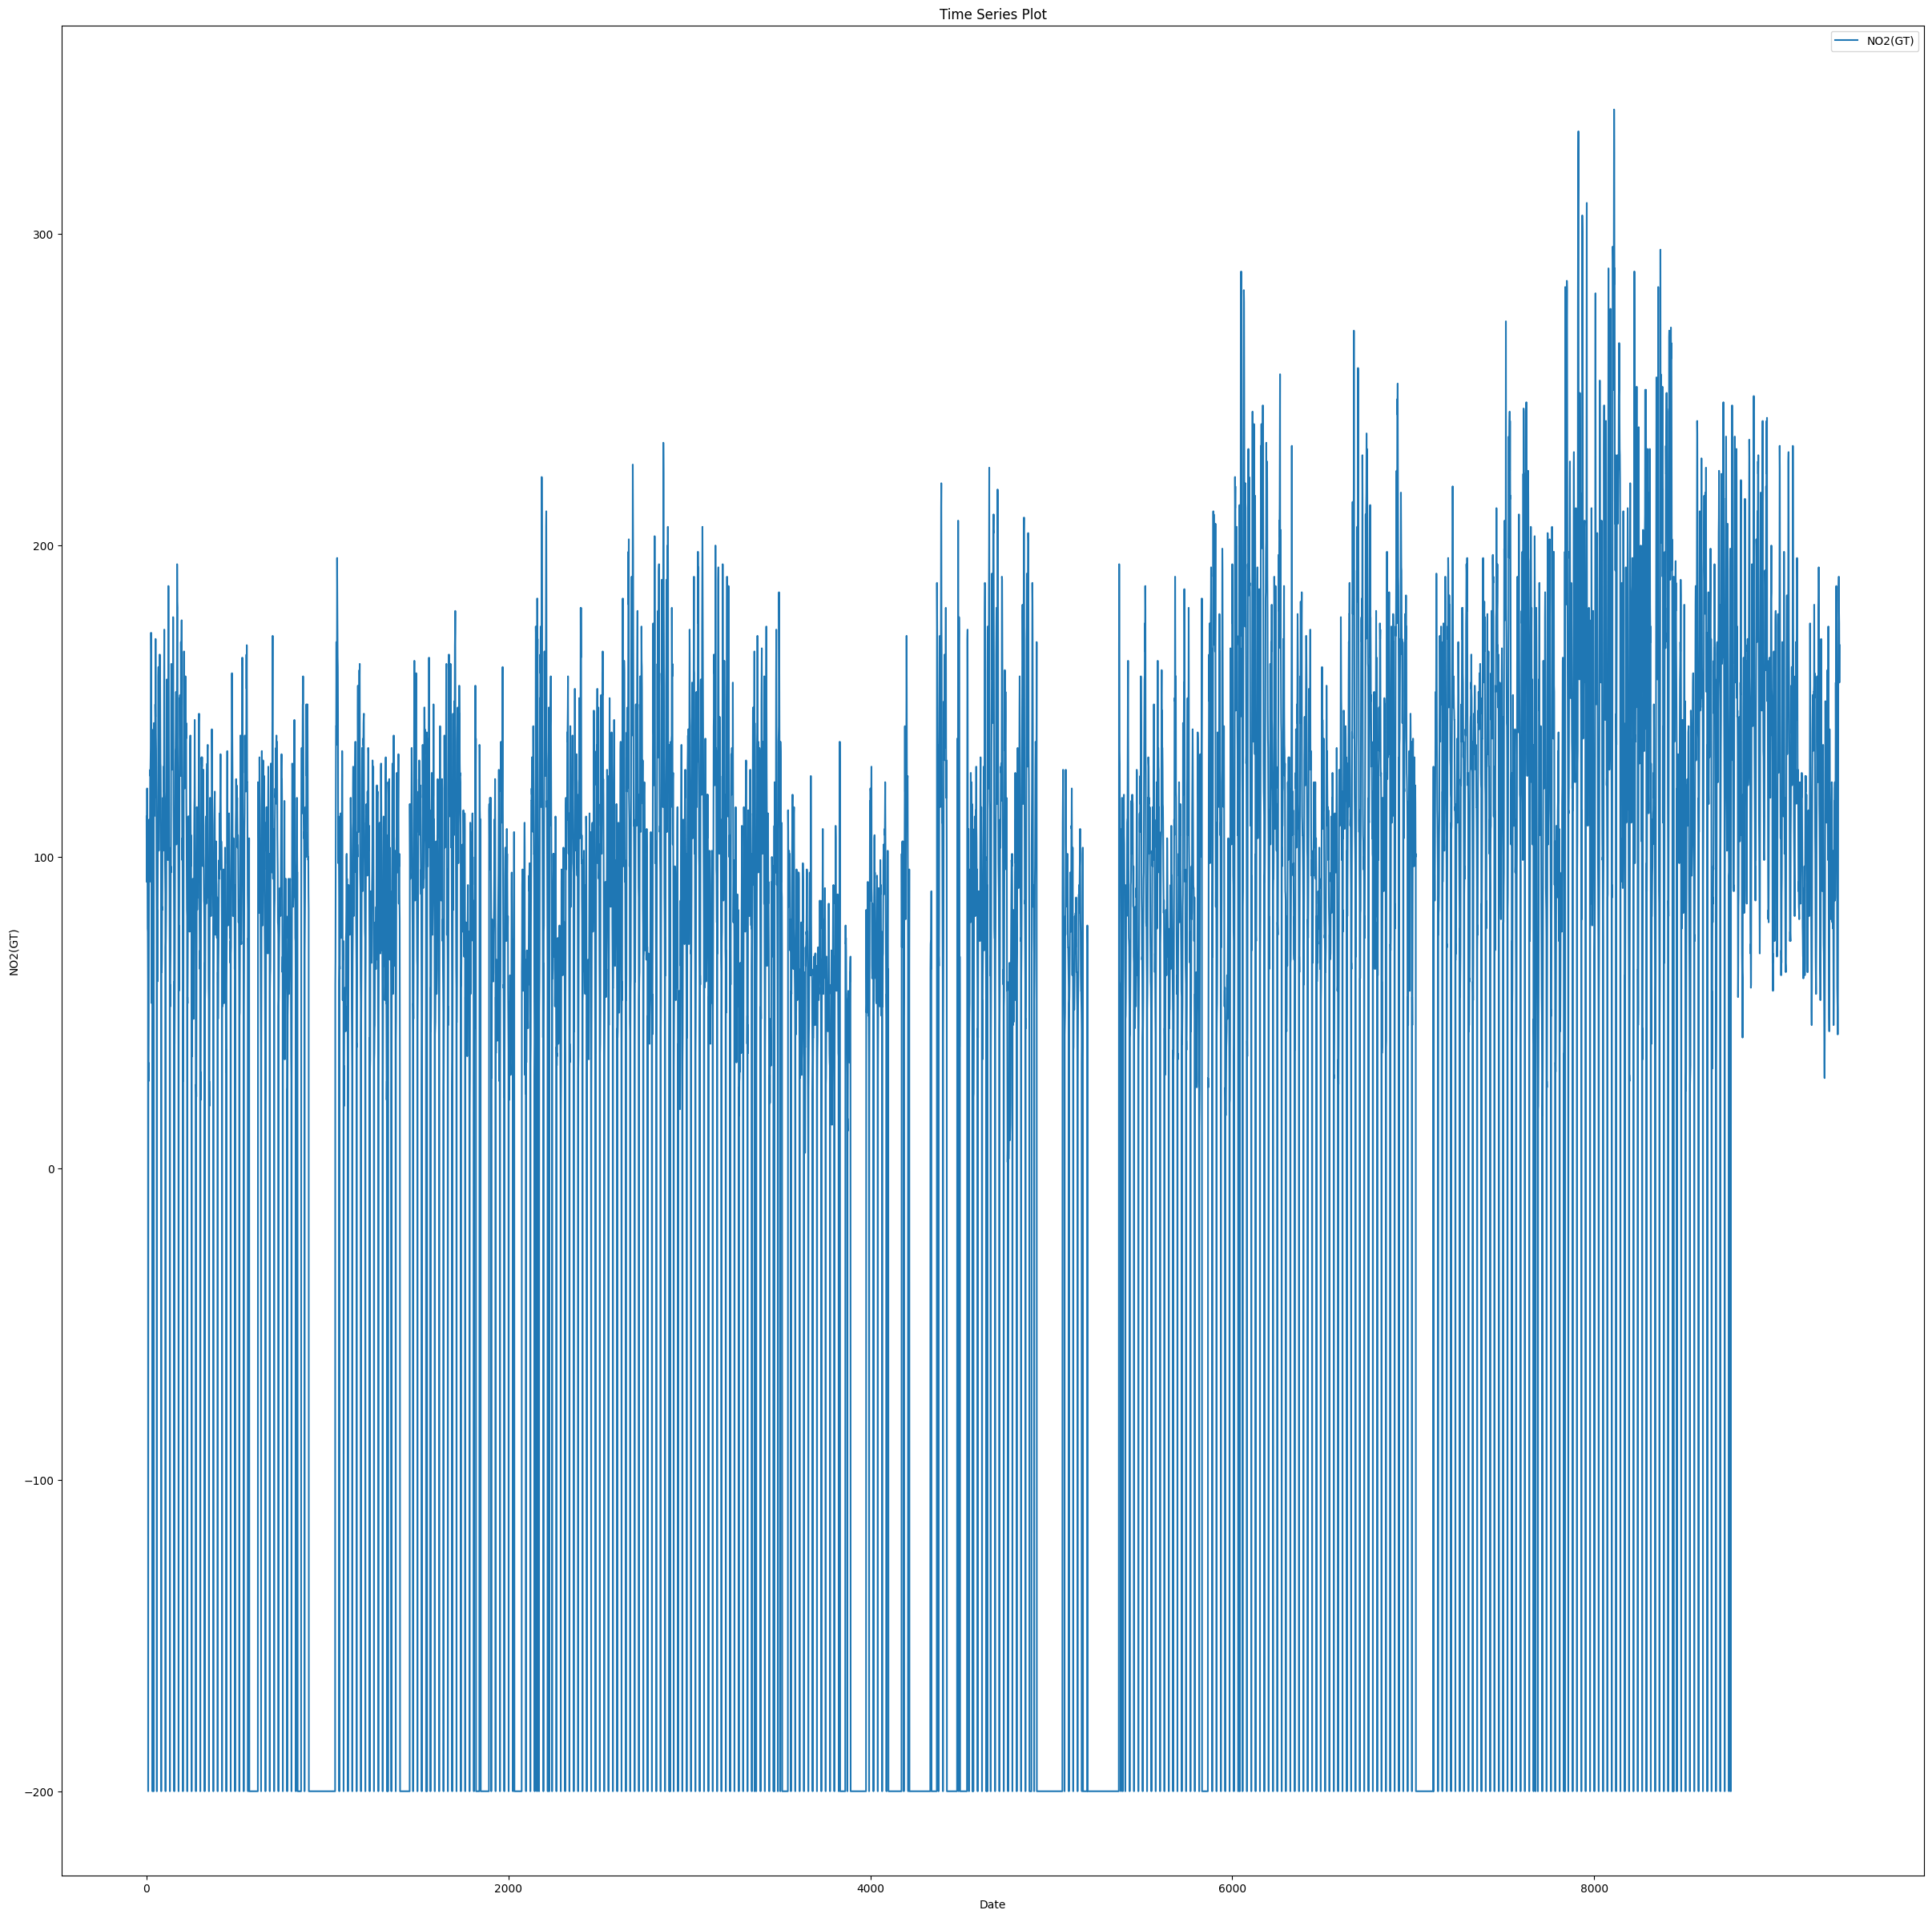

In [15]:
plt.figure(figsize=(30,30))
plt.plot(df.index,df['NO2(GT)'],label='NO2(GT)')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('NO2(GT)')
plt.legend()
plt.show()

In [16]:
df_2.drop('NO2(GT)',axis=1,inplace=True)

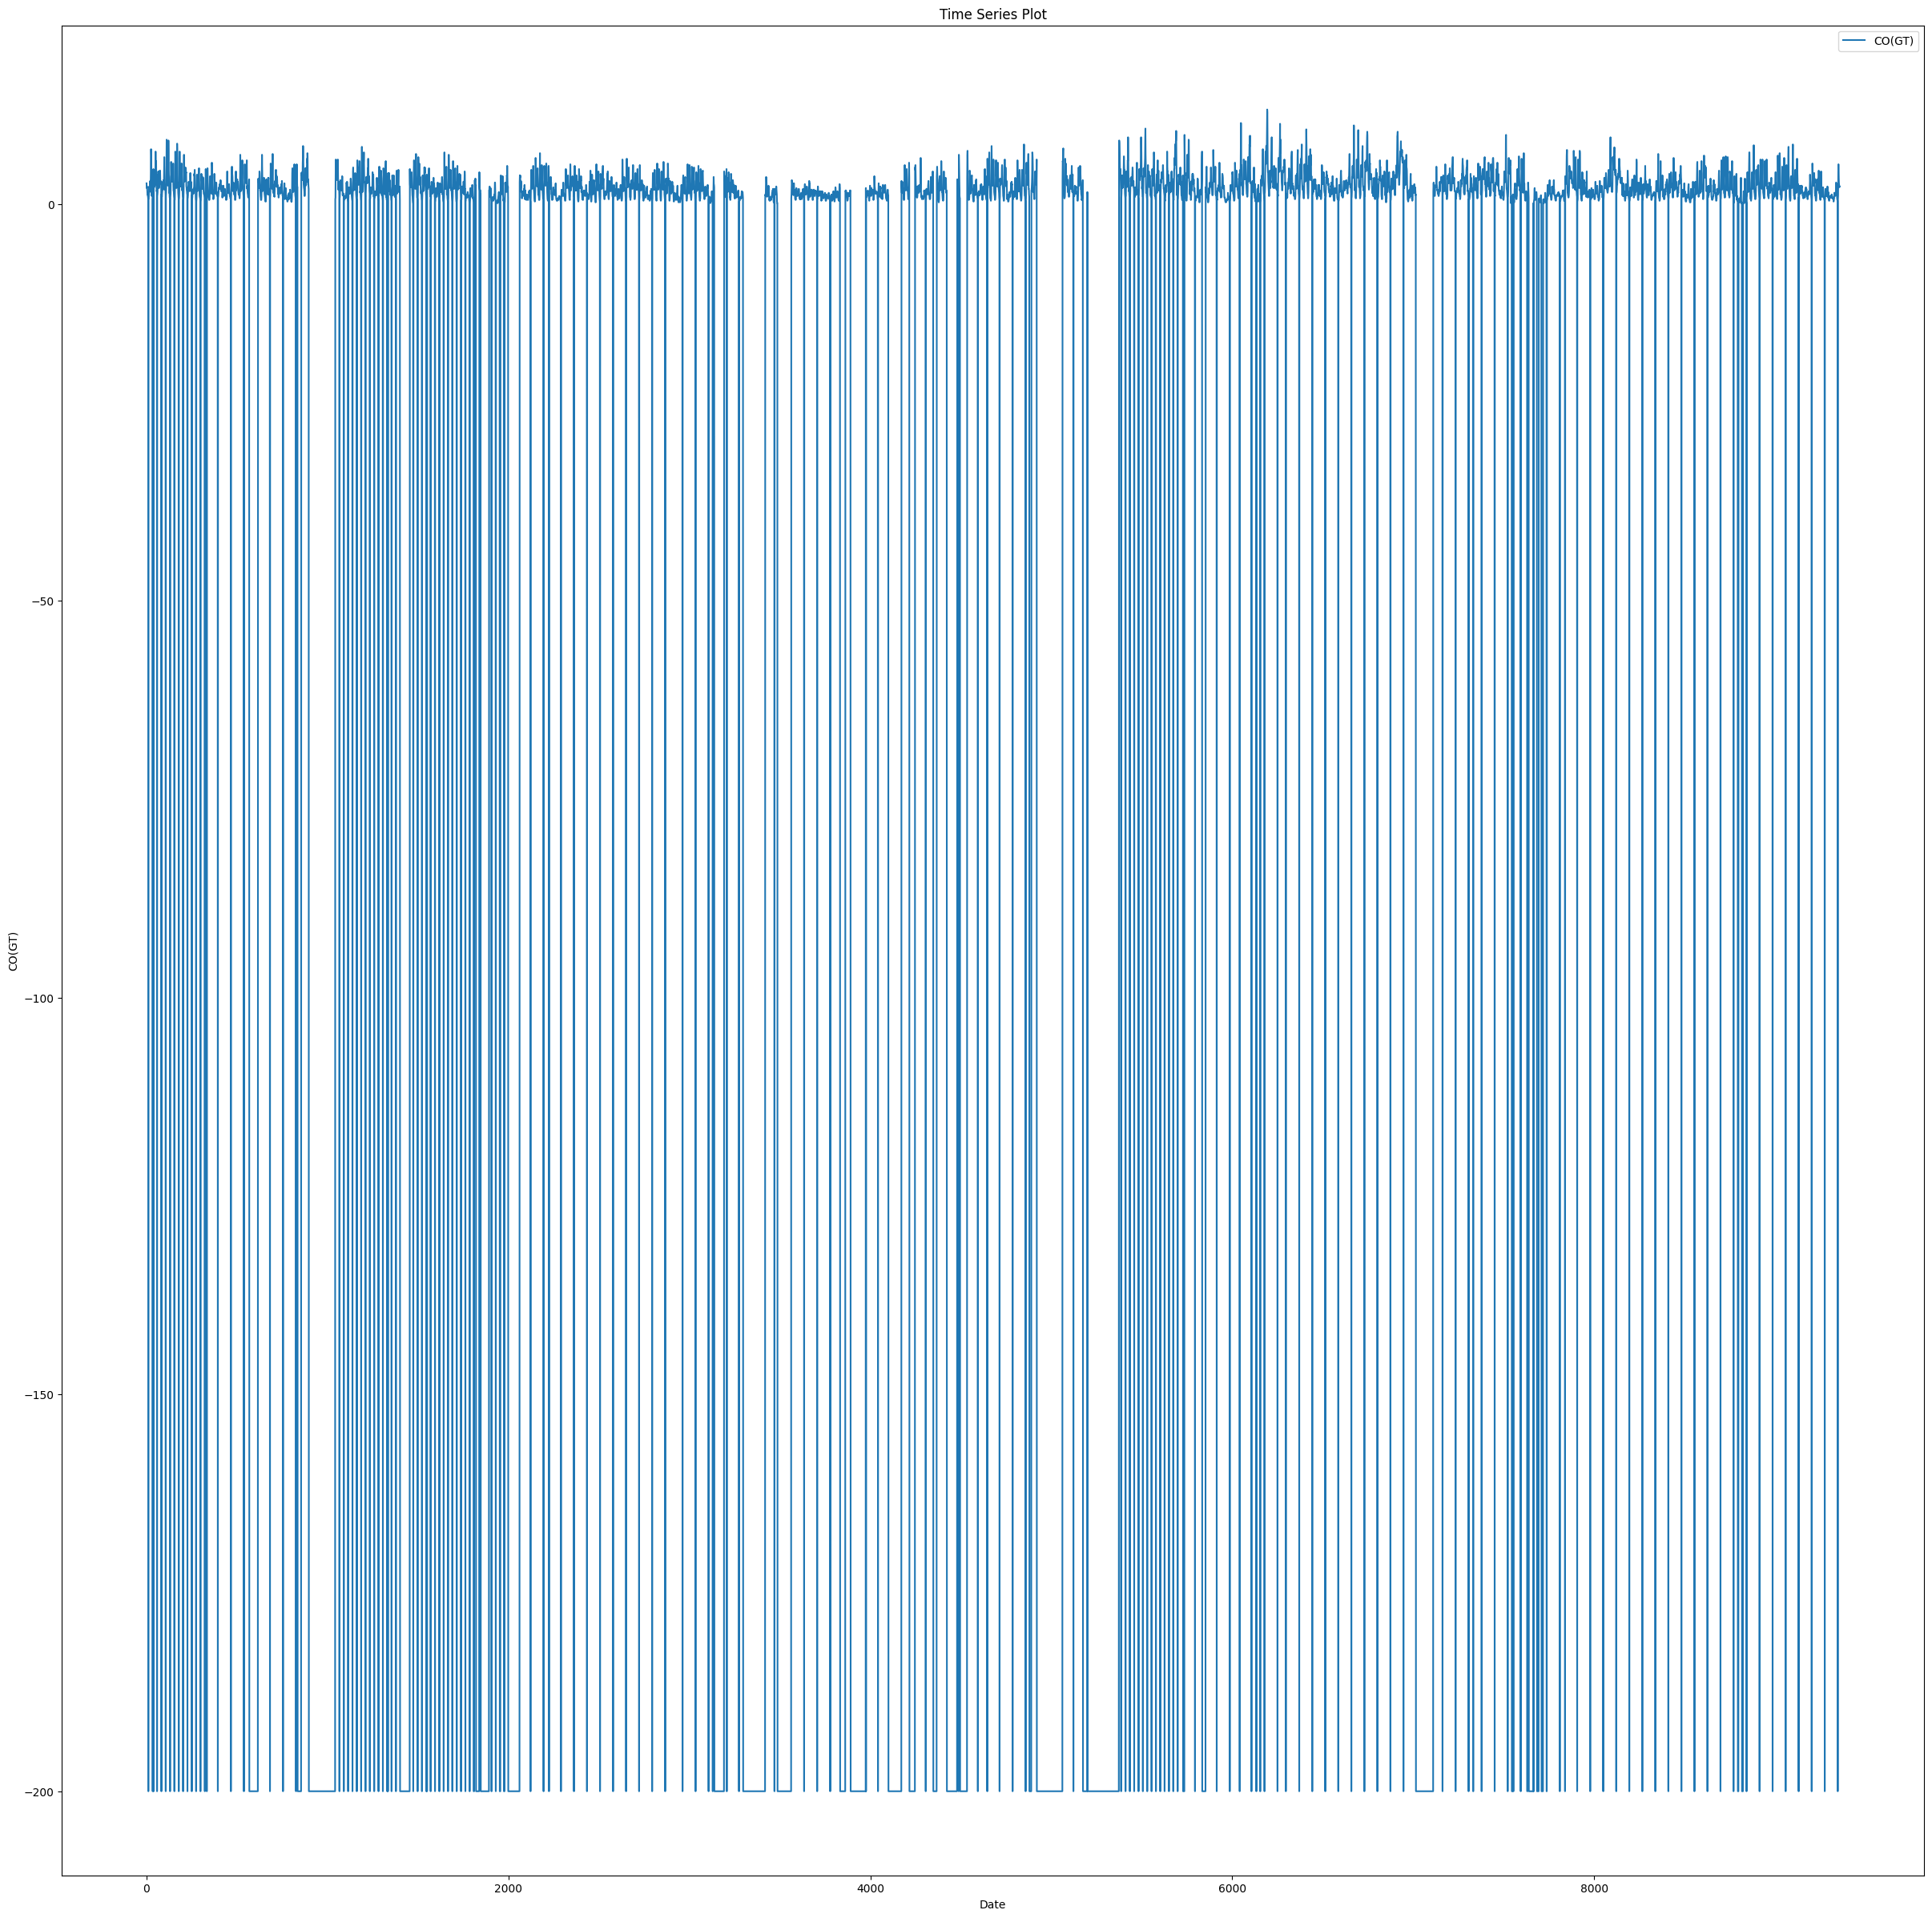

In [17]:
plt.figure(figsize=(30,30))
plt.plot(df_2.index,df_2['CO(GT)'],label='CO(GT)')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

In [18]:
df.head()

,NO2(GT),datetime
0,113,2004-03-10 18:00:00
1,92,2004-03-10 19:00:00
2,114,2004-03-10 20:00:00
3,122,2004-03-10 21:00:00
4,116,2004-03-10 22:00:00


In [19]:
#df_co = df.reset_index()[['datetime', 'NO2(GT)']] 
df.columns = ['y', 'ds']

In [20]:
#df_3 = df_2.reset_index()[['datetime', 'CO(GT)']] 
df_2.columns = ['y', 'ds']

In [21]:
model= Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(df)

18:54:51 - cmdstanpy - INFO - Chain [1] start processing
18:54:53 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = model.make_future_dataframe(periods=1000,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-03-10 18:00:00,86.459280,-65.844682,329.722760,86.459280,86.459280,52.298376,52.298376,52.298376,50.099799,50.099799,50.099799,2.198577,2.198577,2.198577,0.0,0.0,0.0,138.757656
1,2004-03-10 19:00:00,86.378901,-77.299645,341.768319,86.378901,86.378901,46.812237,46.812237,46.812237,43.897380,43.897380,43.897380,2.914857,2.914857,2.914857,0.0,0.0,0.0,133.191138
2,2004-03-10 20:00:00,86.298522,-84.576949,326.425925,86.298522,86.298522,31.694096,31.694096,31.694096,28.082347,28.082347,28.082347,3.611749,3.611749,3.611749,0.0,0.0,0.0,117.992618
3,2004-03-10 21:00:00,86.218143,-107.967608,301.175520,86.218143,86.218143,22.700176,22.700176,22.700176,18.415135,18.415135,18.415135,4.285041,4.285041,4.285041,0.0,0.0,0.0,108.918319
4,2004-03-10 22:00:00,86.137764,-85.029952,330.770969,86.137764,86.137764,25.868131,25.868131,25.868131,20.936972,20.936972,20.936972,4.931159,4.931159,4.931159,0.0,0.0,0.0,112.005895


In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10352,2007-12-26 14:00:00,574.096457,-5264.186413,6598.406861,-5245.845340,6575.957157,7.408529,7.408529,7.408529,8.164903,8.164903,8.164903,-0.756374,-0.756374,-0.756374,0.0,0.0,0.0,581.504986
10353,2007-12-27 14:00:00,574.527089,-5182.531429,6608.317361,-5256.041222,6582.255130,19.355490,19.355490,19.355490,8.164903,8.164903,8.164903,11.190587,11.190587,11.190587,0.0,0.0,0.0,593.882579
10354,2007-12-28 14:00:00,574.957722,-5151.393745,6619.736345,-5261.414708,6588.553103,26.871181,26.871181,26.871181,8.164903,8.164903,8.164903,18.706278,18.706278,18.706278,0.0,0.0,0.0,601.828903
10355,2007-12-29 14:00:00,575.388354,-5356.927620,6765.123369,-5266.609698,6598.885923,3.623863,3.623863,3.623863,8.164903,8.164903,8.164903,-4.541040,-4.541040,-4.541040,0.0,0.0,0.0,579.012218
10356,2007-12-30 14:00:00,575.818986,-5270.263432,6587.414062,-5271.804689,6611.376583,-19.384771,-19.384771,-19.384771,8.164903,8.164903,8.164903,-27.549674,-27.549674,-27.549674,0.0,0.0,0.0,556.434215


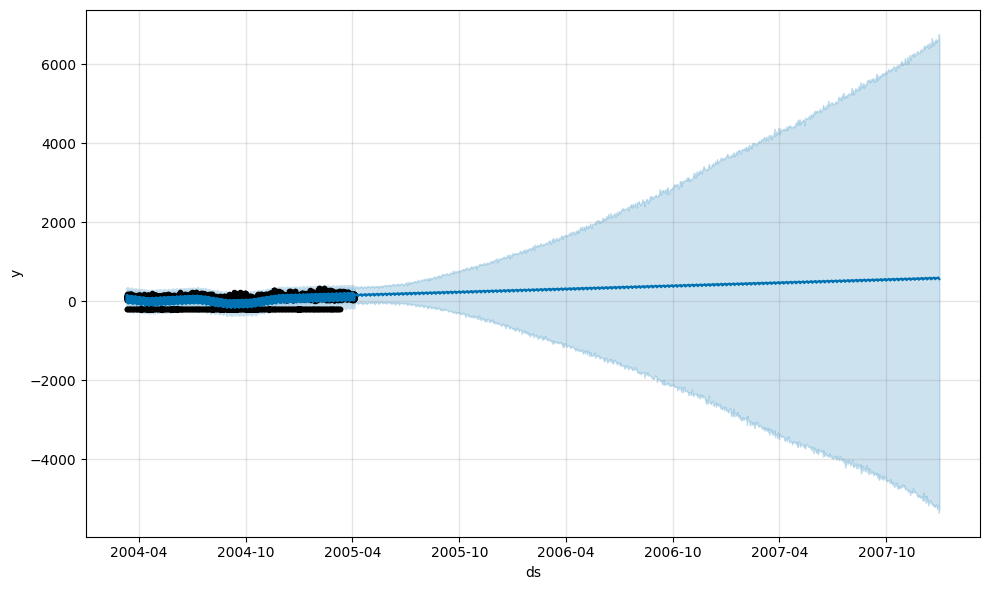

In [24]:
plot1 = model.plot(forecast)

In [25]:
model_2= Prophet(interval_width=0.95, daily_seasonality=True)
model_2.fit(df_2)

18:55:00 - cmdstanpy - INFO - Chain [1] start processing
18:55:01 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = model_2.make_future_dataframe(periods=1000,freq='D')
forecast = model_2.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-03-10 18:00:00,-27.560000,-154.592312,123.665756,-27.560000,-27.560000,2.994481,2.994481,2.994481,10.463792,10.463792,10.463792,-7.469311,-7.469311,-7.469311,0.0,0.0,0.0,-24.565519
1,2004-03-10 19:00:00,-27.568786,-163.564490,127.671717,-27.568786,-27.568786,4.420079,4.420079,4.420079,11.388724,11.388724,11.388724,-6.968645,-6.968645,-6.968645,0.0,0.0,0.0,-23.148707
2,2004-03-10 20:00:00,-27.577572,-173.974322,118.826350,-27.577572,-27.577572,1.163999,1.163999,1.163999,7.641076,7.641076,7.641076,-6.477077,-6.477077,-6.477077,0.0,0.0,0.0,-26.413573
3,2004-03-10 21:00:00,-27.586359,-179.348811,119.408374,-27.586359,-27.586359,-2.839986,-2.839986,-2.839986,3.157274,3.157274,3.157274,-5.997260,-5.997260,-5.997260,0.0,0.0,0.0,-30.426344
4,2004-03-10 22:00:00,-27.595145,-176.674158,115.553536,-27.595145,-27.595145,-2.740036,-2.740036,-2.740036,2.791379,2.791379,2.791379,-5.531415,-5.531415,-5.531415,0.0,0.0,0.0,-30.335181


In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10352,2007-12-26 14:00:00,174.804241,-1120.685561,1538.791200,-1109.731230,1527.918309,-4.628161,-4.628161,-4.628161,4.868177,4.868177,4.868177,-9.496339,-9.496339,-9.496339,0.0,0.0,0.0,170.176080
10353,2007-12-27 14:00:00,174.979441,-1087.171952,1512.731301,-1111.552625,1529.421877,4.757866,4.757866,4.757866,4.868177,4.868177,4.868177,-0.110311,-0.110311,-0.110311,0.0,0.0,0.0,179.737307
10354,2007-12-28 14:00:00,175.154641,-1127.797069,1554.553825,-1113.374019,1530.925445,15.317267,15.317267,15.317267,4.868177,4.868177,4.868177,10.449090,10.449090,10.449090,0.0,0.0,0.0,190.471907
10355,2007-12-29 14:00:00,175.329840,-1140.663209,1550.924881,-1115.195414,1532.429013,11.815516,11.815516,11.815516,4.868177,4.868177,4.868177,6.947339,6.947339,6.947339,0.0,0.0,0.0,187.145356
10356,2007-12-30 14:00:00,175.505040,-1110.978287,1568.895020,-1117.016808,1533.932581,1.165830,1.165830,1.165830,4.868177,4.868177,4.868177,-3.702347,-3.702347,-3.702347,0.0,0.0,0.0,176.670870


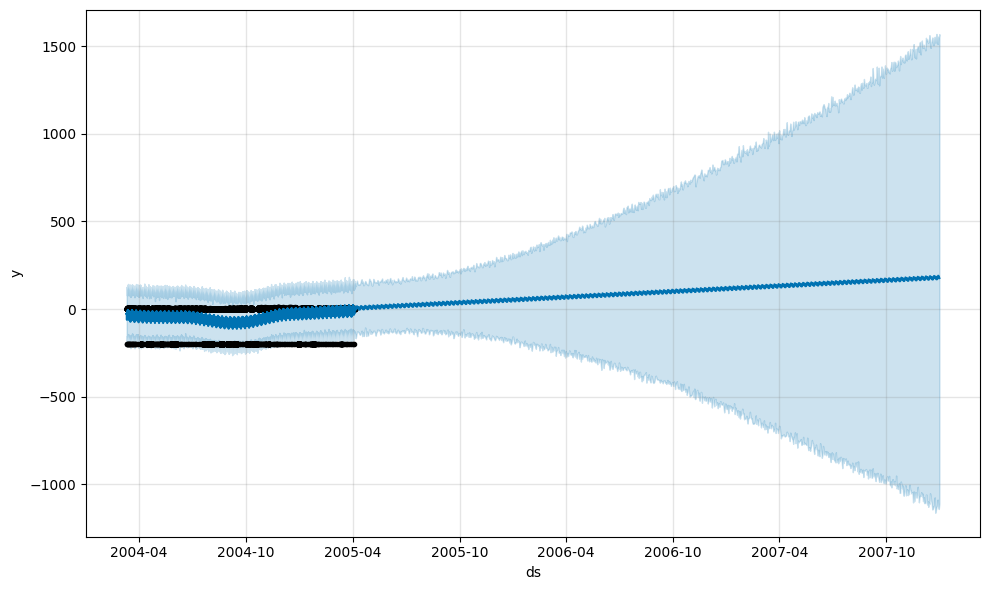

In [28]:
plot2 = model_2.plot(forecast)

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [30]:
df_new.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [31]:
df_new.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [32]:
df_new.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [33]:
df_new['datetime'] = pd.to_datetime(df_new['Date'] + ' ' + df_new['Time'])
df_new = df_new.sort_values('datetime')

In [34]:
df_new.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [35]:
df_new.drop(['Date','Time'],axis=1,inplace=True)

In [36]:
df_new.head(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00


In [37]:
df_new.set_index('datetime')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


In [38]:
def adf_test_all(series_df):
    results = {}
    for col in series_df.columns:
        try:
            result = adfuller(series_df[col].dropna())
            results[col] = {
                'ADF Statistic': result[0],
                'p-value': result[1],
                'Stationary': result[1] < 0.05
            }
        except Exception as e:
            results[col] = {'error': str(e)}
    return results
adf_results = adf_test_all(df_new)
for col, res in adf_results.items():
    if 'error' in res:
        print(f"{col}: ERROR - {res['error']}")
    else:
        print(f"{col}: p-value={res['p-value']:.4f}, Stationary={res['Stationary']}")


CO(GT): p-value=0.0000, Stationary=True
PT08.S1(CO): p-value=0.0000, Stationary=True
NMHC(GT): p-value=0.0000, Stationary=True
C6H6(GT): p-value=0.0000, Stationary=True
PT08.S2(NMHC): p-value=0.0000, Stationary=True
NOx(GT): p-value=0.0000, Stationary=True
PT08.S3(NOx): p-value=0.0000, Stationary=True
NO2(GT): p-value=0.0000, Stationary=True
PT08.S4(NO2): p-value=0.0000, Stationary=True
PT08.S5(O3): p-value=0.0000, Stationary=True
T: p-value=0.0000, Stationary=True
RH: p-value=0.0000, Stationary=True
AH: p-value=0.0000, Stationary=True
datetime: p-value=0.9920, Stationary=False


In [39]:
y =df_new[['CO(GT)','NO2(GT)']]
x = df_new.drop(['CO(GT)','NO2(GT)'],axis=1,inplace=True)


In [40]:
n_obs = int(len(y)*.20)
train = y[:-n_obs]
test =y[-n_obs:]

In [41]:
model = VAR(train)
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        17.90       17.90   5.926e+07       17.90
1        15.69       15.70   6.538e+06       15.70
2        15.35       15.36   4.652e+06       15.36
3        15.28       15.29   4.319e+06       15.28
4        15.26       15.27   4.227e+06       15.26
5        15.25      15.27*   4.211e+06       15.26
6        15.25       15.28   4.211e+06       15.26
7        15.25       15.28   4.213e+06       15.26
8        15.25       15.28   4.209e+06       15.26
9        15.25       15.29   4.199e+06       15.26
10       15.25       15.29   4.187e+06       15.26
11       15.24       15.29   4.169e+06      15.26*
12      15.24*       15.29  4.169e+06*       15.26
13       15.24       15.29   4.172e+06       15.26
14       15.24       15.30   4.173e+06       15.26
15       15.25       15.30   4.177e+06       15.26
-------------------------------

In [42]:
fitted_model = model.fit(2)
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, May, 2025
Time:                     18:55:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.3650
Nobs:                     7484.00    HQIC:                   15.3590
Log likelihood:          -78690.1    FPE:                4.66593e+06
AIC:                      15.3558    Det(Omega_mle):     4.65970e+06
--------------------------------------------------------------------
Results for equation CO(GT)
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -8.000187         0.581551          -13.757           0.000
L1.CO(GT)          0.561197         0.010221           54.906           0.000
L1.NO2(GT)         0.252249         0.005268           47.885          

In [43]:
forecast_values = fitted_model.forecast(train.values[-2:], steps=len(test))
forecast_df = pd.DataFrame(forecast_values, index=test.index, columns=y.columns)

In [44]:
forecast_df.head(5)

,CO(GT),NO2(GT)
7486,-3.413062,80.860233
7487,-4.579958,79.597954
7488,-6.959281,78.619597
7489,-8.652673,77.457346
7490,-10.427773,76.184567


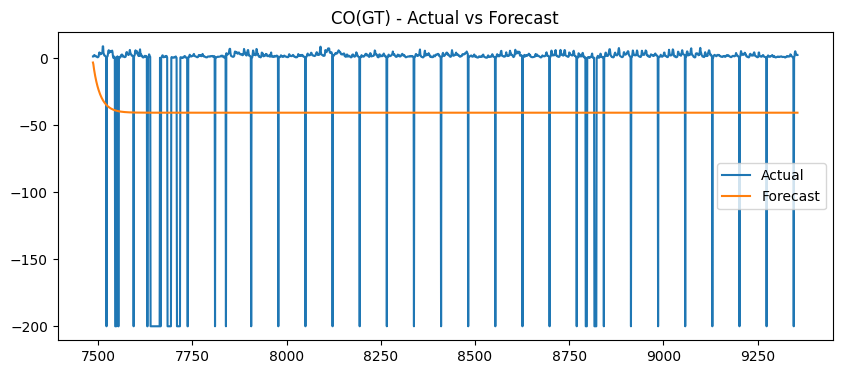

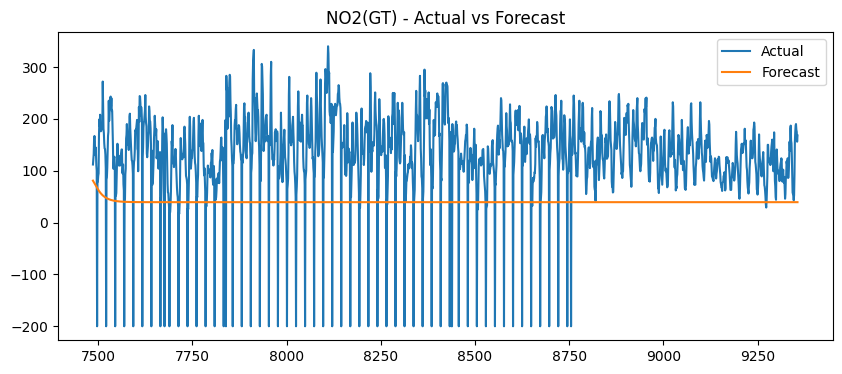

In [45]:
for col in y.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(test.index, test[col], label='Actual')
    plt.plot(forecast_df.index, forecast_df[col], label='Forecast')
    plt.title(f'{col} - Actual vs Forecast')
    plt.legend()
    plt.show()
